In [1]:
from utils import train_inference, benchmark_sample_from_inference, eval_samples, save_results, get_results, query
import sbi
from sbi.inference import SNLE, SNRE, SNPE

import torch
torch.manual_seed(0)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("../../.matplotlibrc")

In [2]:
print(sbi.__version__)

0.22.0


## NPE

Here we can evaluate all three sampling methods i.e. `direct`, `mcmc`, and `vi`.

In [3]:
mcmc_method = "slice_np_vectorized"
mcmc_parameters = {"num_chains": 100}

In [10]:
dimensions = [2, 5, 10, 20]
method = SNPE


for d in dimensions:
    x_o = torch.tensor([0.0]*d)
    inf, true_posterior = train_inference(method, d, num_simulations=5000)

    # Direct sampling
    samples, times = benchmark_sample_from_inference(inf, 1000, x_o, seeds=[1,2,3,4,5], sample_with = "direct")
    c2sts = eval_samples(samples, true_posterior(x_o))
    save_results("SNPE", d, "direct", None, times, c2sts)

In [7]:
dimensions = [2, 5, 10, 20]
method = SNLE

for d in dimensions:
    x_o = torch.tensor([0.0]*d)
    inf, true_posterior = train_inference(method, d, num_simulations=5000)
    # VI sampling
    samples_vi, times_vi = benchmark_sample_from_inference(inf, 1000, x_o, seeds=[1,2,3,4,5], sample_with = "vi", vi_parameters={})
    c2sts_vi = eval_samples(samples_vi, true_posterior(x_o))
    save_results("SNLE", d, "vi", None, times_vi, c2sts_vi)

    # MCMC sampling
    samples_mcmc, times_mcmc = benchmark_sample_from_inference(inf, 1000, x_o, seeds=[1,2,3,4,5], sample_with = "mcmc", mcmc_method=mcmc_method, mcmc_parameters=mcmc_parameters)
    c2sts_mcmc = eval_samples(samples_mcmc, true_posterior(x_o))
    save_results("SNLE", d, "mcmc", str((mcmc_method, mcmc_parameters)), times_mcmc, c2sts_mcmc)

 Neural network successfully converged after 126 epochs.

In [6]:
direct_color = "#6495ED"
MCMC_color = "#FFA07A"
VI_color = "#7b2e8b"

color_palette = {"direct": direct_color, "mcmc": MCMC_color, "vi": VI_color}

In [7]:
# Benchmark sampling times

df = query()

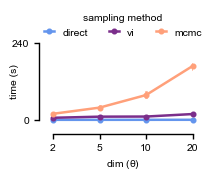

In [9]:
fig = plt.figure(figsize=(1.8,1.))

# linewidth = 2
outward = 10
# ticklength = 4
# tickwidth = 1




ax = sns.pointplot(data=df, x="dimension", y="times", hue="sampling_method", log_scale=False, legend=True, markersize=3, palette=color_palette, clip_on=False)
ax.set_ylabel("time (s)", labelpad=-5)
ax.set_xlabel(r"dim ($\theta$)")

ax.set_ylim(0,240)
ax.set_yticks([0,240])

ax.set_xlim(0,3)

# ax.tick_params(right="off",top="off", direction = "out")
# ax.ti

for line in ["left","bottom"]:
    #ax.spines[line].set_linewidth(linewidth)
    ax.spines[line].set_position(("outward",outward))


ax.legend(title="sampling method", loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=3, handlelength=1)
fig.savefig("./figs/default_sampling_times.svg", bbox_inches="tight")
fig.savefig("./figs/default_sampling_times.png", bbox_inches="tight")

In [17]:
# fig = plt.figure(figsize=(3,2))
# ax = sns.boxplot(data=df, x="dimension", y="times", hue="sampling_method", log_scale=True, legend=True, linewidth=0.5)
# ax.set_ylabel("time (s)")
# ax.set_xlabel(r"dim ($\theta$)")
# ax.legend(title="sampling method", loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3)
# fig.savefig("./figs/default_sampling_times_log_scale.svg", bbox_inches="tight")
# fig.savefig("./figs/default_sampling_times_log_scale.png", bbox_inches="tight")